<a href="https://colab.research.google.com/github/tachytelicdetonation/Collab/blob/master/fastai_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import matplotlib.pyplot as plt

In [0]:
path = untar_data(URLs.PETS);path

PosixPath('/content/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/content/data/oxford-iiit-pet/images'),
 PosixPath('/content/data/oxford-iiit-pet/annotations')]

In [0]:
img_path = path/'images'
ano_path = path/'annotations'

In [0]:
fnames = get_image_files(img_path)
batch_size = 32

In [0]:
fnames[:5]

[PosixPath('/content/data/oxford-iiit-pet/images/Ragdoll_148.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/Bombay_186.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/saint_bernard_14.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/shiba_inu_131.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/Ragdoll_141.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(img_path,fnames,pat,ds_tfms = get_transforms(),size = 224, bs = batch_size).normalize(imagenet_stats)

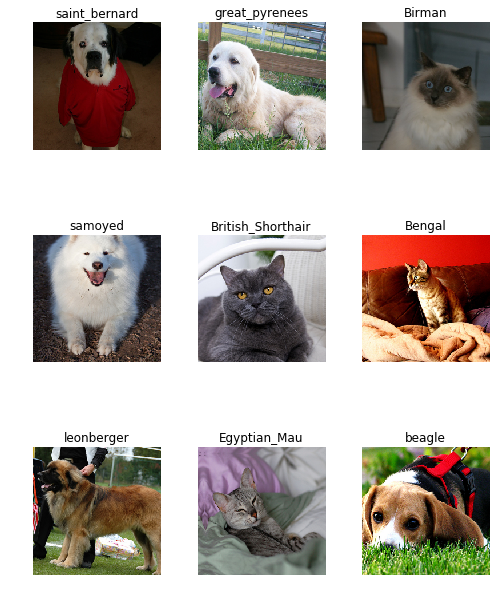

In [0]:
data.show_batch(rows = 3, figsize = (7,9))

In [0]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [0]:
learn = cnn_learner(data,models.resnet50,metrics = error_rate)

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.638077,0.281459,0.079838,01:37
1,0.402529,0.246185,0.081191,01:35
2,0.270782,0.203488,0.064953,01:32
3,0.187830,0.180448,0.054127,01:31


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idx5 = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idx5)

True

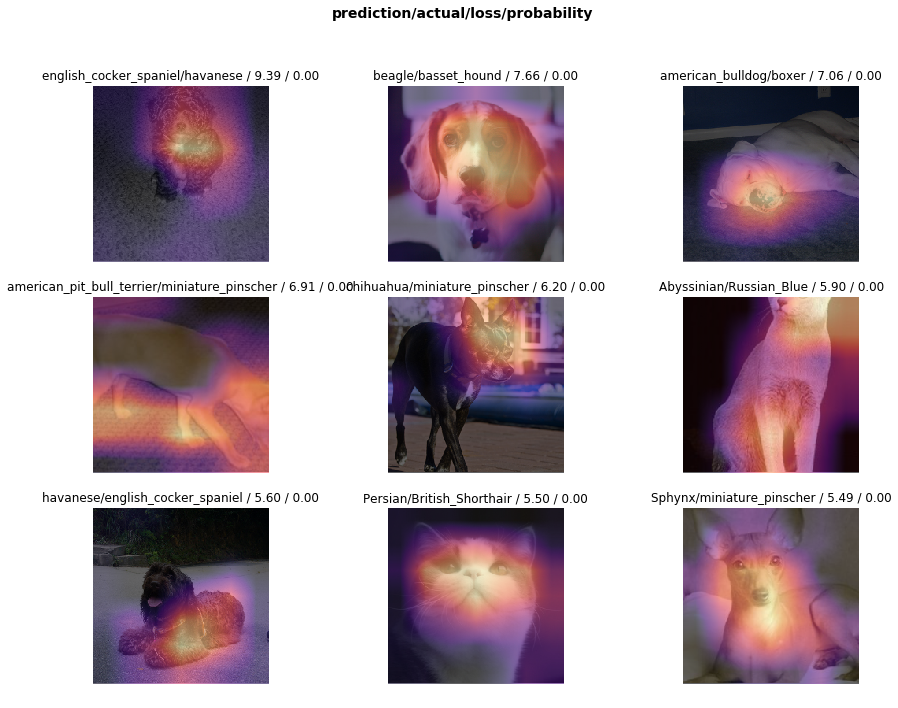

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Ragdoll', 'Birman', 3),
 ('english_cocker_spaniel', 'havanese', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Ragdoll', 'Siamese', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('boxer', 'american_bulldog', 2),
 ('boxer', 'staffordshire_bull_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2)]

In [0]:
learn.lr_find(num_it = 200)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


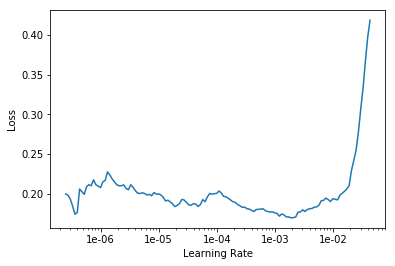

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3,max_lr = 3e-7)

epoch,train_loss,valid_loss,error_rate,time
0,0.194268,0.182034,0.057510,01:37
1,0.179115,0.179109,0.053451,01:38
2,0.192723,0.179267,0.053451,01:38


In [0]:
learn.save('model-optimize-1')

In [28]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr= slice(2e-5,4e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.279543,0.333004,0.101489,01:40
1,0.254885,0.201522,0.065629,01:40
2,0.113105,0.169420,0.053451,01:39


In [30]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr= slice(2e-6,4e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.108442,0.195757,0.058863,01:40
1,0.075678,0.170586,0.048714,01:44
2,0.064006,0.167132,0.051421,01:42
